In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  
import seaborn as sns

#import data
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"

#Assign dataframe and parse the dates
df = pd.read_csv(url , parse_dates=['created_date'])

df.head()




,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-29 08:24:17,45267666,HEAT/HOT WATER,11207.0,736 DUMONT AVENUE,DUMONT AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666739,-73.891413,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-29 16:13:08,45267056,HEAT/HOT WATER,10451.0,835 WALTON AVENUE,WALTON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.826117,-73.924757,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-29 15:44:30,45266339,HEAT/HOT WATER,11103.0,25-29 34 STREET,34 STREET,ADDRESS,Astoria,The following complaint conditions are still o...,QUEENS,40.769265,-73.916135,NaN,RESIDENTIAL BUILDING,Open
3,2019-12-29 12:24:35,45267713,HEAT/HOT WATER,10462.0,2181 BARNES AVENUE,BARNES AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.855984,-73.863834,NaN,RESIDENTIAL BUILDING,Open
4,2019-12-29 12:34:10,45265752,HEAT/HOT WATER,10455.0,540 CONCORD AVENUE,CONCORD AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.812821,-73.908226,NaN,RESIDENTIAL BUILDING,Open


In [6]:

# Datetime format

df['created_date'] =  pd.to_datetime(df['created_date'])

#Combine Heating and Hot Water because they are similar
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

#Number of Complaints in each Complaint Type
df['complaint_type'].value_counts()



HEAT/HOT WATER            2121720
PLUMBING                   709198
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       448430
PAINT - PLASTER            361257
PAINT/PLASTER              345225
ELECTRIC                   306425
NONCONST                   260890
DOOR/WINDOW                204025
WATER LEAK                 192413
GENERAL                    150267
FLOORING/STAIRS            136929
APPLIANCE                  112095
HPD Literature Request      52830
SAFETY                      51185
OUTSIDE BUILDING             7107
ELEVATOR                     6658
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979737 entries, 0 to 5979736
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 684.3+ MB


In [8]:
#Keep date and Key Columns 

cols = ['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
        'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude', 'resolution_description','status','street_name']
df1 = df.drop(cols, axis = 1)
df1.columns

Index(['created_date', 'unique_key'], dtype='object')

In [9]:
df1.head()

,created_date,unique_key
0,2019-12-29 08:24:17,45267666
1,2019-12-29 16:13:08,45267056
2,2019-12-29 15:44:30,45266339
3,2019-12-29 12:24:35,45267713
4,2019-12-29 12:34:10,45265752


In [12]:
df1['date'] = df1['created_date'].map(lambda x: x.strftime('%Y-%m'))
df1['created_year'] = df1['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
df1.head()

,created_date,unique_key,date,created_year
0,2019-12-29 08:24:17,45267666,2019-12,2019
1,2019-12-29 16:13:08,45267056,2019-12,2019
2,2019-12-29 15:44:30,45266339,2019-12,2019
3,2019-12-29 12:24:35,45267713,2019-12,2019
4,2019-12-29 12:34:10,45265752,2019-12,2019


In [13]:
# Format to '%Y-%m'
df1 = df1.drop(['created_date', 'created_year'], axis =1)
df1 = df1.sort_values('date')
df1.head()

,unique_key,date
224290,15663337,2010-01
264635,15778904,2010-01
264634,15778903,2010-01
264633,15778902,2010-01
264632,15778901,2010-01


In [14]:
# # of Complaints
df1 = df1.groupby(['date']).count()['unique_key']
df1 = pd.DataFrame(df1)
df1 = df1.rename(index=str, columns={"unique_key": "no_of_complaints"})

df1.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', name='date', length=120)

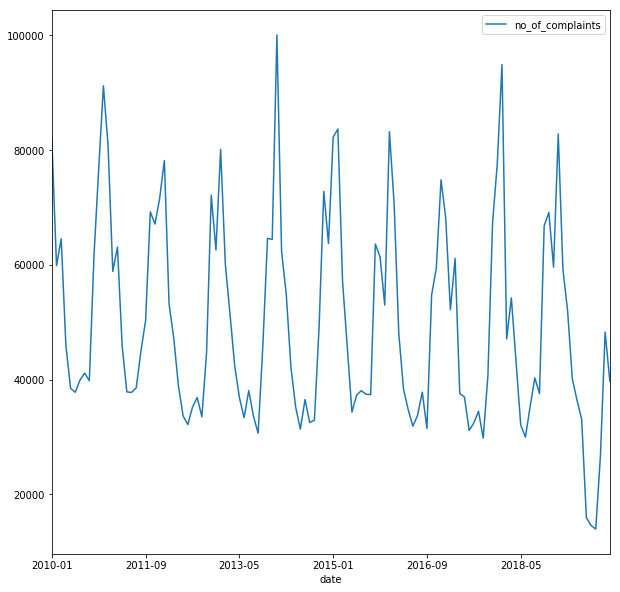

In [15]:
#Rough Plot

df1.plot(figsize=(10, 10))
plt.show()

In [16]:
df1 = df1.reset_index('date')
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date')

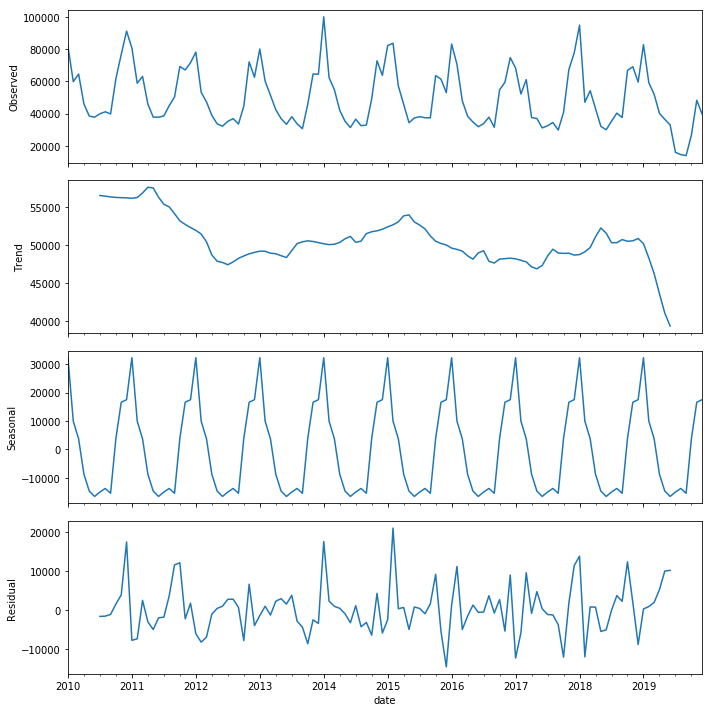

In [21]:
#Create the Time dependant ARIMA Model

import statsmodels.api as sm

plt.rcParams['figure.figsize'] = 10, 10
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

In [42]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.api as sm
import itertools
import warnings
from pylab import rcParams



p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2926.9614291898233
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2556.1203731979426
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2293.222294105415
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2015.9503555686338


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No fre

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2307.5854812484695
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2285.7721831942017
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2050.5327534997386
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2015.944020884536


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2823.185585364973
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2514.526633217514
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2262.6597778882306
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1989.3213499332185


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2549.249827894293
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2503.8180148771644
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2042.9073201379306


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1990.3307668183845
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2588.2698326890695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2303.961600774032
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2300.1428519545043
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2010.198851887944
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2300.5603669870316


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2261.8227215762586
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2049.1216177446536
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2009.7146760874632


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2569.1023499810835
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2281.4606622172173
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2245.629072533851


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1966.6849778430196
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2300.578507149459
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2250.881945053272


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2022.4525755438167
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1968.5224439208355
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2610.546979260701


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2323.2656278031063
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2281.2688020860105
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2005.9065197328746
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2296.514621554207


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2292.7700564056677
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2018.9335588022186


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2007.3761793425683
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2589.752174763417
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2301.6268898185713
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2262.06739640466


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1982.8128613604636
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2297.860840107364
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2270.3547552265563


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2020.0091166456411


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1984.5086230678294
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2590.065898496263
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2301.9481618173527
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2285.8869154579716
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2000.4903464970164


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2283.657355824952
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2273.6424895926334
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2015.899860173907


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2002.220284444144
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2570.305736461528
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2283.2271043202286
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2247.0289477149413


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1968.0637335405972
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2278.564850873292


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2252.855953336083
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2002.135395039956


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1969.9025492532337


In [45]:

mod = sm.tsa.statespace.SARIMAX(df1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

data = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6229      0.095     -6.523      0.000      -0.810      -0.436
ma.S.L12      -0.5806      0.084     -6.935      0.000      -0.745      -0.416
sigma2      1.162e+08   2.03e-10   5.72e+17      0.000    1.16e+08    1.16e+08


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


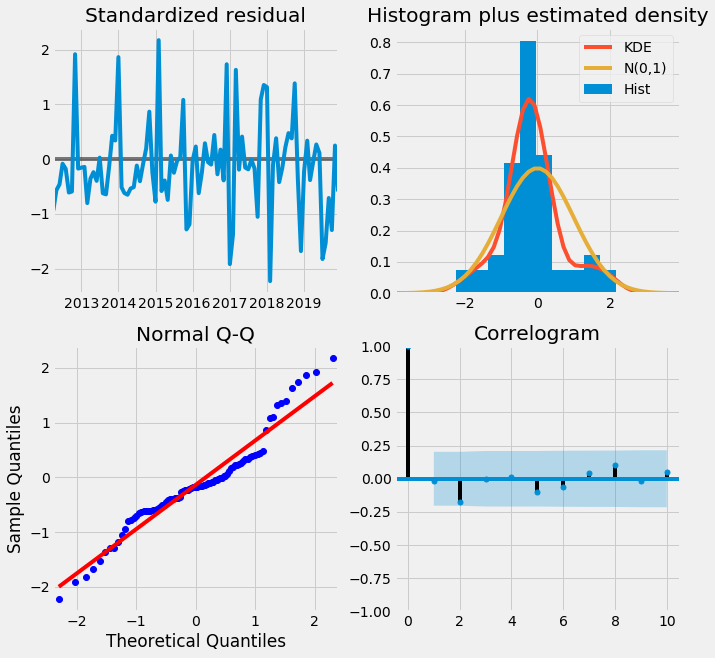

In [46]:
data.plot_diagnostics(figsize=(10, 10))
plt.show()

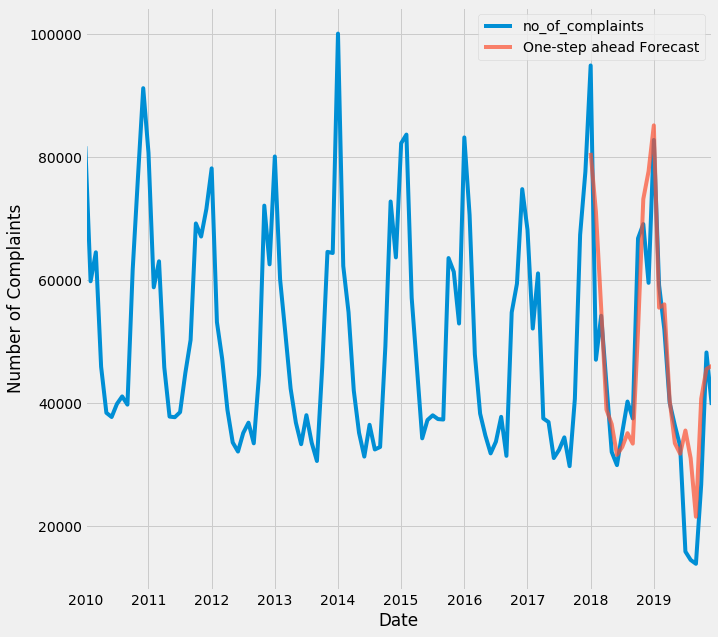

In [53]:
#We see that a normal distribution is followed from the histrogram and that the Normal QQ follows linearly also suggesting that the residuals follow the normal distribution 

prediction = results.get_prediction(start=pd.to_datetime('2018-01'), dynamic=False)
prediction2 = prediction.conf_int()
ax = df1['2010':].plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Complaints')
plt.legend()

plt.show()

In [ ]:
#Conclusion : A time series (ARIMA) may be used to predict future number of complaints, but the large confidence interval means that can  alter the parameters further that will allow us to better predict complaints further into the time series. 